In [1]:
# Lo primero que hago para poder trabajar con los datos es importar las librerias necesarias:

# Para tratamiento de datos:
# ----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# configuro pandas para que me muestre todas las columnas del dataframe

pd.set_option('display.max_columns', None)

In [2]:
# Abro los csv y los guardo en dos dataframes, uno llamado customer_info 
# (porque contiene informacion detallada del cliente), y otro llamado customer_flights 
# (contiene informacion de los vuelos realizados por el cliente)

customer_info = pd.read_csv("files/Customer Loyalty History.csv")
customer_flights = pd.read_csv("files/Customer Flight Activity.csv")

# FASE 1.1: EXPLORACION DATOS

## EDA CUSTOMER INFO

In [4]:
# Exploro el numero columnas y filas, lo hago con el metodo shape, que contiene una tupla cuyo primer elemento (index 0) es el 
# numero de filas y su segundo elemento (index 1) es el numero de columnas. 

print(f""" 
El numero de filas que tenemos en customer_info son {customer_info.shape[0]} y el numero de columnas 
que tenemos son {customer_info.shape[1]} 
-------------------------------------------------------------------------------------------------------""")

# Miramos primeros 4 elementos 

print(f"Vamos a ver una pequeña muestra de su contenido:\n\n4 PRIMERAS FILAS\n-----------------------------------------------------------------------") # metodo head()

customer_info.head(4)

 
El numero de filas que tenemos en customer_info son 16737 y el numero de columnas 
que tenemos son 16 
-------------------------------------------------------------------------------------------------------
Vamos a ver una pequeña muestra de su contenido:

4 PRIMERAS FILAS
-----------------------------------------------------------------------


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN


In [5]:
print("4 ULTIMAS FILAS\n-----------------------------------------------------------------------")
customer_info.tail(5)

4 ULTIMAS FILAS
-----------------------------------------------------------------------


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


In [6]:
print("4 FILAS ALEATORIAS\n-----------------------------------------------------------------------")

customer_info.sample(5)

4 FILAS ALEATORIAS
-----------------------------------------------------------------------


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
1850,392206,Canada,British Columbia,West Vancouver,V6V 8Z3,Male,College,NaN,Single,Aurora,6869.19,Standard,2012,12,NaN,NaN
2965,243455,Canada,Alberta,Edmonton,T9G 1W3,Male,Bachelor,60252.0,Divorced,Aurora,9597.47,Standard,2017,4,NaN,NaN
12068,862258,Canada,British Columbia,Vancouver,V6E 3D9,Female,Bachelor,60452.0,Married,Star,3011.34,Standard,2016,2,NaN,NaN
9159,757879,Canada,British Columbia,Whistler,V6T 1Y8,Male,Bachelor,55131.0,Divorced,Nova,14019.83,Standard,2017,2,NaN,NaN
5618,566630,Canada,Ontario,Toronto,M1R 4K3,Male,Bachelor,66856.0,Single,Nova,4100.40,Standard,2016,1,NaN,NaN


In [45]:
# mirando tail, head y sample puedo sacar algunas conclusiones:

print(f"""
1) Parece que Loyalty Number es un identificador unico para cada cliente, teniendo en cuenta el numero de filas
   totales y que el metodo unique devuelve un array con todos los elementos únicos, si 
   la longitud del array coincide con el numero de filas sabemos que todos los registros son unicos 
   (no hay dos iguales en todo el dataframe). 
   ¿COINCIDE EL NUMERO DE REGISTROS UNICOS CON EL TOTAL DE FILAS? ==> {len(customer_info['Loyalty Number'].unique()) == customer_info.shape[0]}
   Podemos concluir que Loyalty Number es el identificador único para el cliente. 
   Otra forma de ver si hay registros duplicados solo en la columna ['Loyalty Number'] seria usando como parámetro subset='Loyalty Number'.
   DUPLICADOS LOYALTY NUMBER ==> {customer_info.duplicated(subset='Loyalty Number').sum()}
   
2) Aparentemente el país es Canadá en todos los registros de 'Country'

3) Cancellation Year y Cancellation Month tienen muchos NaN, probablemente sean de clientes que no han cancelado, 
   en este caso los nulos sí aportan información valiosa.
   
4) En Salary hay muchos valores NaN, seguramente porque no dispongamos de datos, suficientes, tendremos que 
   gestionarlo. 
""")


1) Parece que Loyalty Number es un identificador unico para cada cliente, teniendo en cuenta el numero de filas
   totales y que el metodo unique devuelve un array con todos los elementos únicos, si 
   la longitud del array coincide con el numero de filas sabemos que todos los registros son unicos 
   (no hay dos iguales en todo el dataframe). 
   ¿COINCIDE EL NUMERO DE REGISTROS UNICOS CON EL TOTAL DE FILAS? ==> True
   Podemos concluir que Loyalty Number es el identificador único para el cliente. 
   Otra forma de ver si hay registros duplicados solo en la columna ['Loyalty Number'] seria usando como parámetro subset='Loyalty Number'.
   DUPLICADOS LOYALTY NUMBER ==> 0
   
2) Aparentemente el país es Canadá en todos los registros de 'Country'

3) Cancellation Year y Cancellation Month tienen muchos NaN, probablemente sean de clientes que no han cancelado, 
   en este caso los nulos sí aportan información valiosa.
   
4) En Salary hay muchos valores NaN, seguramente porque no dispon

In [8]:
# Vamos a investigar un poco más los nulos de Salary

# Primero muestro una muestra del dataframe filtrando unicamente para que me muestre registros donde Salary es nulo, por ver 
# si siguen algún patrón. 
display(customer_info[customer_info['Salary'].isna() == True].sample(8))
print("En la muestra que he filtrado, todas los registros de Education son College...\n ¿Casualidad? ¿O todos los nulos son de esta categoria?")

print(f"""
Vamos a comprobarlo haciendo un recuento de los distintos valores para la columna Education donde Salary es nulo ==> 
Las categorias de Educación que tienen nulos en Salary son ==>
{customer_info[customer_info['Salary'].isna() == True]['Education'].unique()}

Voy a comprobar si el recuento de nulos en Salary coincide con el recuento total de clientes con Education == College

Clientes College ==> {customer_info[customer_info['Education'] == 'College']['Loyalty Number'].count()} clientes con Education College

Salary Nulo ==> {customer_info['Salary'].isnull().sum()} registros nulos 

Conclusion: No se ha hecho una buena recogida de datos del grupo College, porque no tenemos informacion de su salario en ninguno de ellos""")

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
949,821325,Canada,Quebec,Montreal,H2Y 2W2,Male,College,NaN,Married,Aurora,5186.36,Standard,2018,5,NaN,NaN
5784,491244,Canada,New Brunswick,Fredericton,E3B 2H2,Male,College,NaN,Single,Aurora,8048.37,2018 Promotion,2018,2,NaN,NaN
10081,257705,Canada,Ontario,Toronto,M2M 6J7,Male,College,NaN,Divorced,Star,2294.30,Standard,2014,10,NaN,NaN
14316,744234,Canada,Ontario,Toronto,M2Z 4K1,Male,College,NaN,Single,Star,6732.97,Standard,2015,7,NaN,NaN
14493,268643,Canada,Ontario,Toronto,M2Z 4K1,Female,College,NaN,Single,Star,7250.03,Standard,2018,10,NaN,NaN
14584,464606,Canada,Quebec,Quebec City,G1B 3L5,Female,College,NaN,Married,Star,7429.08,Standard,2014,11,NaN,NaN
12564,317726,Canada,Ontario,Toronto,P2T 6G3,Male,College,NaN,Married,Star,4060.96,Standard,2015,3,NaN,NaN
2510,487228,Canada,Ontario,Kingston,M9K 2P4,Male,College,NaN,Divorced,Aurora,8273.11,Standard,2018,1,NaN,NaN


En la muestra que he filtrado, todas los registros de Education son College...
 ¿Casualidad? ¿O todos los nulos son de esta categoria?

Vamos a comprobarlo haciendo un recuento de los distintos valores para la columna Education donde Salary es nulo ==> 
Las categorias de Educación que tienen nulos en Salary son ==>
['College']

Voy a comprobar si el recuento de nulos en Salary coincide con el recuento total de clientes con Education == College

Clientes College ==> 4238 clientes con Education College

Salary Nulo ==> 4238 registros nulos 

Conclusion: No se ha hecho una buena recogida de datos del grupo College, porque no tenemos informacion de su salario en ninguno de ellos


In [50]:
# Nombre y datos de columnas: metodo columns y info()

print(f"""
Para ver unicamente el nombre de las columnas puedo usar customer_info.columns ==> \n{customer_info.columns}
\n---------------------------------------------------------------------------------------------

Otra opcion es usar customer_info.info(), que además de los nombres da informacion extra: 
*** Tipo datos de cada columna  
***Elementos NO nulos en cada columna

---------------------------------------------------------------------------------------------
Con metodo info ==> \n""")
customer_info.info()



Para ver unicamente el nombre de las columnas puedo usar customer_info.columns ==> 
Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

---------------------------------------------------------------------------------------------

Otra opcion es usar customer_info.info(), que además de los nombres da informacion extra: 
*** Tipo datos de cada columna  
***Elementos NO nulos en cada columna

---------------------------------------------------------------------------------------------
Con metodo info ==> 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  in

In [51]:
print("""
Conclusiones tras ver los que me muestra el metodo info()
- Solo hay 3 columnas con valores nulos, que son ==> Salary, Cancellation Year y Cancellation Month
- Hay incongruencia con el tipo de datos de "Enrollment Year", "Enrollment Month", "Cancellation Year" y "Cancellation Month"
  Pues siendo mismo tipo de informacion (año y mes), en unos figura como float y en otros como int, habría que homogeneizarlos.
""")


Conclusiones tras ver los que me muestra el metodo info()
- Solo hay 3 columnas con valores nulos, que son ==> Salary, Cancellation Year y Cancellation Month
- Hay incongruencia con el tipo de datos de "Enrollment Year", "Enrollment Month", "Cancellation Year" y "Cancellation Month"
  Pues siendo mismo tipo de informacion (año y mes), en unos figura como float y en otros como int, habría que homogeneizarlos.



In [11]:
# calculamos el total de nulos de cada columna en porcentaje, pues lo que más nos importa es la proporcion
porcentaje_nulos = customer_info.isnull().sum()/customer_info.shape[0] *100
# para ello dividimos la suma de todos los nulos de cada columna por el numero total de filas y multiplicamos por 100

# Hacemos un dataframe y filtramos solo las columnas que tienen nulos para una mejor visualizacion
nulos_customer_info = pd.DataFrame(porcentaje_nulos, columns=['% Nulos'])

print("El porcentaje de Nulos que tenemos en el dataframa customer_info es ==> ")
nulos_customer_info[nulos_customer_info['% Nulos'] > 0]


El porcentaje de Nulos que tenemos en el dataframa customer_info es ==> 


,% Nulos
Salary,25.321145
Cancellation Year,87.650117
Cancellation Month,87.650117


In [12]:
print('''
Conclusion respecto al análisis de nulos: \n
  - Proporción muy alta de nulos en columnas Cancellation Year y Cancellation Month, bajo mi punto de vista
    estos nulos aportan información. Se corresponden con clientes que no se han dado de baja.
  - En cambio, en la columna Salary nos falta informacion para un 25% de los registros, siendo un dato 
    importante, pues nos da informacion de la solvencia económica de nuestros clientes. 
    De cara a que afecte lo mínimo a estudios estadísticos que se puedan hacer con estos datos, una buena opción
    sería imputar estos nulos por la media o la mediana (dependiendo del grado de dispersion de los datos, lo cual
    veremos más adelante.)
''')


Conclusion respecto al análisis de nulos: 

  - Proporción muy alta de nulos en columnas Cancellation Year y Cancellation Month, bajo mi punto de vista
    estos nulos aportan información. Se corresponden con clientes que no se han dado de baja.
  - En cambio, en la columna Salary nos falta informacion para un 25% de los registros, siendo un dato 
    importante, pues nos da informacion de la solvencia económica de nuestros clientes. 
    De cara a que afecte lo mínimo a estudios estadísticos que se puedan hacer con estos datos, una buena opción
    sería imputar estos nulos por la media o la mediana (dependiendo del grado de dispersion de los datos, lo cual
    veremos más adelante.)



In [13]:
# Comprobamos si tenemos algún registro duplicado
print(f"El número de registros duplicados que tenemos en customer_info es {customer_info.duplicated().sum()} duplicados")
# No hay registros duplicados

El número de registros duplicados que tenemos en customer_info es 0 duplicados


In [14]:
# Ahora voy a explorar ciertos parámetros estadísticos.

customer_info.describe()
# por defecto nos devuelve estadisticos de variables numéricas

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,16737.000000,12499.000000,16737.000000,16737.000000,16737.000000,2067.000000,2067.000000
mean,549735.880445,79245.609409,7988.896536,2015.253211,6.669116,2016.503145,6.962748
std,258912.132453,35008.297285,6860.982280,1.979111,3.398958,1.380743,3.455297
min,100018.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326603.000000,59246.500000,3980.840000,2014.000000,4.000000,2016.000000,4.000000
50%,550434.000000,73455.000000,5780.180000,2015.000000,7.000000,2017.000000,7.000000
75%,772019.000000,88517.500000,8940.580000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


In [15]:
print(f""" Conclusiones que puedo sacar de describe:\n
1) Hay un salario que despunta hacia abajo, el minimo es -58486, voy a mirar si hay más salarios negativos 
NUMERO SALARIOS NEGATIVOS ==> {customer_info['Salary'][customer_info['Salary'] < 0].count()}
Tenemos un total de 20 salarios negativos, entiendo que es gente que tiene deudas. 

2) La diferencia entre el salario minimo y el salario maximo es muy elevada.
DIFERENCIA ENTRE SALARIO MÁXIMO Y MINIMO ==> {customer_info['Salary'].max() - customer_info['Salary'].min()}

3) Aunque la diferencia entre la media y la mediana de los salarios es pequeña, la dispersion de los datos es
alta (existencia de muchos valores muy separados de la media
Media, Mediana y Desviación Típica 'Salary' ==>
{customer_info['Salary'].agg(['mean', 'median', 'std'])}

4) La columna CLV (Valor aportado por el cliente a la empresa) tiene una dispersión muy alta de los datos, y la diferencia entre el valor máximo y mínimo es 
también muy elevada. La media y la mediana son significativamente diferentes

Media, Mediana y Desviación Típica 'CLV' ==>\n{customer_info['CLV'].agg(['mean', 'median','std'])}")

-----------------------------------------------------------------------------------------------------------------

CONCLUSION ==> Tenemos clientes con valores atipicos, tanto si miramos el salario, como si miramos el 
valor que aportan a la compañia. Si tenemos que usar alguna parámetro estadistico de centralización de datos es preferible usar la 
mediana, por la alta dispersion, tanto en 'Salary' como en 'CLV'
""")


 Conclusiones que puedo sacar de describe:

1) Hay un salario que despunta hacia abajo, el minimo es -58486, voy a mirar si hay más salarios negativos 
NUMERO SALARIOS NEGATIVOS ==> 20
Tenemos un total de 20 salarios negativos, entiendo que es gente que tiene deudas. 

2) La diferencia entre el salario minimo y el salario maximo es muy elevada.
DIFERENCIA ENTRE SALARIO MÁXIMO Y MINIMO ==> 465714.0

3) Aunque la diferencia entre la media y la mediana de los salarios es pequeña, la dispersion de los datos es
alta (existencia de muchos valores muy separados de la media
Media, Mediana y Desviación Típica 'Salary' ==>
mean      79245.609409
median    73455.000000
std       35008.297285
Name: Salary, dtype: float64

4) La columna CLV (Valor aportado por el cliente a la empresa) tiene una dispersión muy alta de los datos, y la diferencia entre el valor máximo y mínimo es 
también muy elevada. La media y la mediana son significativamente diferentes

Media, Mediana y Desviación Típica 'CLV' ==>

In [16]:
# Para usar describe sobre variables categóricas usamos include=object
customer_info.describe(include=object).T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [52]:
print(f""" 
Conclusiones de aplicar el metodo describe sobre variables de tipo categórico:
    1) El único país del Dataframe es Canadá, por lo que tendremos que valorar si es una columna que aporte valor 
       o la eliminamos
    2) Tenemos clientes de 11 provincias, donde predomina Ontario
    3) La mayoría de los clientes tienen estudio Bachelor
    4) No hay una diferencia significativa entre el número de hombres y mujeres, predominan discretamente las mujeres 
       pero no es una diferencia significativa
    5) Predominan los clientes Casados, que son más de la mitad del total. 
""")


 
Conclusiones de aplicar el metodo describe sobre variables de tipo categórico:
    1) El único país del Dataframe es Canadá, por lo que tendremos que valorar si es una columna que aporte valor 
       o la eliminamos
    2) Tenemos clientes de 11 provincias, donde predomina Ontario
    3) La mayoría de los clientes tienen estudio Bachelor
    4) No hay una diferencia significativa entre el número de hombres y mujeres, predominan discretamente las mujeres 
       pero no es una diferencia significativa
    5) Predominan los clientes Casados, que son más de la mitad del total. 



In [18]:
print(f"""
Si miramos las diferentes opciones de país que hay en el dataframe vemos que solo aparece Canadá
PAíSES DISTINTOS EN EL DATAFRAME ==> \n{customer_info['Country'].unique()}
""")


Si miramos las diferentes opciones de país que hay en el dataframe vemos que solo aparece Canadá
PAíSES DISTINTOS EN EL DATAFRAME ==> 
['Canada']



In [19]:
customer_info['Province'].value_counts().reset_index()
# la mayoria de los clientes provienen de Ontario, British Columbia y Quebec. 

,Province,count
0,Ontario,5404
1,British Columbia,4409
2,Quebec,3300
3,Alberta,969
4,Manitoba,658
5,New Brunswick,636
6,Nova Scotia,518
7,Saskatchewan,409
8,Newfoundland,258
9,Yukon,110


In [20]:
customer_info['Education'].value_counts().reset_index()
# distribución del nivel educativo de los clientes. 

,Education,count
0,Bachelor,10475
1,College,4238
2,High School or Below,782
3,Doctor,734
4,Master,508


In [21]:
customer_info['Marital Status'].value_counts().reset_index()
# distribución de los clientes según su estado civil. 

,Marital Status,count
0,Married,9735
1,Single,4484
2,Divorced,2518


## EDA customer_flights

In [22]:
# Metodo shape (ver dimensiones filas y columnas dataframe)
 
print(f""" 
El numero de filas que tenemos en customer_flights son {customer_flights.shape[0]} y el numero de columnas 
que tenemos son {customer_flights.shape[1]} 
-------------------------------------------------------------------------------------------------------""")

# Miramos primeros 4 elementos 

print(f"Vamos a ver una pequeña muestra de su contenido:\n\n4 PRIMERAS FILAS\n-----------------------------------------------------------------------") # metodo head()

customer_flights.head(4)


 
El numero de filas que tenemos en customer_flights son 405624 y el numero de columnas 
que tenemos son 10 
-------------------------------------------------------------------------------------------------------
Vamos a ver una pequeña muestra de su contenido:

4 PRIMERAS FILAS
-----------------------------------------------------------------------


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0


In [23]:
print(f"4 ULTIMAS FILAS\n-----------------------------------------------------------------------") # metodo head()

customer_flights.tail(4)

4 ULTIMAS FILAS
-----------------------------------------------------------------------


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


In [24]:
print("4 FILAS ALEATORIAS\n-----------------------------------------------------------------------")

customer_flights.sample(4)

4 FILAS ALEATORIAS
-----------------------------------------------------------------------


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
147591,756663,2017,9,0,0,0,0,0.0,0,0
401819,794620,2018,12,0,0,0,0,0.0,0,0
236964,118612,2018,3,0,0,0,0,0.0,0,0
51498,141877,2017,4,2,0,2,3020,302.0,0,0


In [25]:
# informacion general usando metodo info()

customer_flights.info()

print(f""" 
-----------------------------------------------------------------------------------------------
Todos los elementos de este dataframe son de tipo numérico, y no hay ninguna columna con registros 
nulos, puesto el recuento de no nulos es igual que el numero total de entradas. 

Comprobamos que la suma de nulos es 0 ==> \n{customer_flights.isnull().sum()}""")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB
 
-----------------------------------------------------------------------------------------------
Todos los elementos de este data

In [26]:
# valores duplicados con metodo duplicated()

print(f"""
Existen un total de {customer_flights.duplicated().sum()} 
valores duplicados
para ver las columnas que están duplicadas podemos filtrarlas
""")

display(customer_flights[customer_flights.duplicated() == True])

print("* En la fase de limpieza tendremos que eliminarlos, pues no tiene sentido tener filas repetidas")




Existen un total de 1864 
valores duplicados
para ver las columnas que están duplicadas podemos filtrarlas



,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0
567,130331,2017,1,0,0,0,0,0.0,0,0
660,135421,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
404668,949628,2018,12,0,0,0,0,0.0,0,0
404884,960050,2018,12,0,0,0,0,0.0,0,0
405111,971370,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0


* En la fase de limpieza tendremos que eliminarlos, pues no tiene sentido tener filas repetidas


In [27]:
# Analizar parámetros estadisticos con describe()

customer_flights.describe()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000
mean,550037.873084,2017.500000,6.500000,4.115052,1.031805,5.146858,1208.880059,123.692721,30.696872,2.484503
std,258935.286969,0.500001,3.452057,5.225518,2.076869,6.521227,1433.155320,146.599831,125.486049,10.150038
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,326961.000000,2017.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,550834.000000,2017.500000,6.500000,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000
75%,772194.000000,2018.000000,9.250000,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000
max,999986.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000


In [28]:
print(f"""
Conclusiones que podemos sacar con el uso de describe:
------------------------------------------------------------------
Las columnas ==> \n{customer_flights.columns[3:]} tienen mucha dispersion de los datos, por lo que es de esperar 
que nos encontremos con valores atípicos.
Como hay diferencias significativas entre media y mediana si hubiera que usar alguna medida de centralizacion 
sería preferible el uso de la mediana""")


Conclusiones que podemos sacar con el uso de describe:
------------------------------------------------------------------
Las columnas ==> 
Index(['Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object') tienen mucha dispersion de los datos, por lo que es de esperar 
que nos encontremos con valores atípicos.
Como hay diferencias significativas entre media y mediana si hubiera que usar alguna medida de centralizacion 
sería preferible el uso de la mediana


## UNIMOS LOS DOS DATAFRAMES

In [29]:
# Como tienen datos complementarios, y una columna común, podemos usar el metodo merge, realizando un inner join 
# con la columna común como nexo.
# el metodo merge si no especificamos nada por defecto usa un inner join, podríamos añadir how='inner' pero no hace falta
customer_final = customer_info.merge(customer_flights, on='Loyalty Number')


In [30]:
# guardo el nuevo dataframe 
customer_final.to_csv('files/Customer Final.csv', index=False)

In [31]:
# numero columnas y filas:

print(f""" 
El numero de filas que tenemos en customer_info son {customer_final.shape[0]} y el numero de columnas 
que tenemos son {customer_final.shape[1]} 
-------------------------------------------------------------------------------------------------------""")

# Miramos primeros 4 elementos 

print(f"Vamos a ver una pequeña muestra de su contenido:\n\n4 PRIMERAS FILAS\n-----------------------------------------------------------------------") # metodo head()

customer_final.head(4)

 
El numero de filas que tenemos en customer_info son 405624 y el numero de columnas 
que tenemos son 25 
-------------------------------------------------------------------------------------------------------
Vamos a ver una pequeña muestra de su contenido:

4 PRIMERAS FILAS
-----------------------------------------------------------------------


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0


In [32]:
print("""
Las 4 primeras columnas parecen muy similares, pero si nos fijamos son registros del numero de vuelos 
reservados y la distancia recorrida según el mes que estemos analizando. 
En esta tabla se repiten los Loyalty number porque aunque cada Loyalty Number está asociado con un cliente
aqui se está registrando la actividad de compras de este cliente (en este caso vuelos)
""")


Las 4 primeras columnas parecen muy similares, pero si nos fijamos son registros del numero de vuelos 
reservados y la distancia recorrida según el mes que estemos analizando. 
En esta tabla se repiten los Loyalty number porque aunque cada Loyalty Number está asociado con un cliente
aqui se está registrando la actividad de compras de este cliente (en este caso vuelos)



## 1.2 LIMPIEZA DE DATOS

In [33]:
# ELIMINAMOS DUPLICADOS

filas_inicial = customer_final.shape[0]

customer_final.drop_duplicates(inplace = True)
# con inplace = True modificamos el dataframe original
print(f"""
ELIMINAMOS DUPLICADOS: 
El dataframe antes de  la limpieza tiene un total de {filas_inicial} filas.
Despues de eliminar los elementos duplicados el numero de filas se queda en {customer_final.shape[0]}
En total se han eliminado {filas_inicial - customer_final.shape[0]} filas que estaban repetidas""")



ELIMINAMOS DUPLICADOS: 
El dataframe antes de  la limpieza tiene un total de 405624 filas.
Despues de eliminar los elementos duplicados el numero de filas se queda en 403760
En total se han eliminado 1864 filas que estaban repetidas


In [34]:
# Eliminamos la columna Country, pues tiene todos los registros idénticos, todos los clientes son de Canadá

print(f"""
REGISTRO PAIS ==> \n{customer_final['Country'].value_counts()}
ELIMINAMOS LA COLUMNA Country, pues todos los registros son Canadá.
--------------------------------------------------------------------------------
Las columnas iniciales del dataframe son \n{customer_final.columns}""")
customer_final.drop(columns=['Country'], inplace=True)

print(f"""-------------------------------------------------------------------------------
Despues de eliminar la columna Country las columnas actualizadas del dataframe son \n{customer_final.columns}""")




REGISTRO PAIS ==> 
Country
Canada    403760
Name: count, dtype: int64
ELIMINAMOS LA COLUMNA Country, pues todos los registros son Canadá.
--------------------------------------------------------------------------------
Las columnas iniciales del dataframe son 
Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')
-------------------------------------------------------------------------------
Despues de eliminar la columna Country las columnas actualizadas del dataframe son 
Index(['Loyalty Number', 'Province', 'City', 'Postal Code', 'Gender',
       'Education', 'Salary', 

In [35]:
# Calculo la proporción actualizada de nulos en el dataframe final

porcentaje_nulos_final = customer_final.isnull().sum()/customer_final.shape[0] *100

# Hacemos un dataframe y filtramos solo las columnas que tienen nulos para una mejor visualizacion
nulos_customer_final = pd.DataFrame(porcentaje_nulos_final, columns=['% Nulos'])

print(f"PORCENTAJE NULOS ACTUALIZADO ==>")
nulos_customer_final[nulos_customer_final['% Nulos'] > 0]



PORCENTAJE NULOS ACTUALIZADO ==>


,% Nulos
Salary,25.326927
Cancellation Year,87.703091
Cancellation Month,87.703091


In [36]:
# Tenemos dos dataframes, customer_final, y customer_info con nulos, ambos dataframes tendremos que usarlos para visualizacion
# Lo más eficiente hubiera sido, creo yo, hacer la limpieza de nulos antes del merge. En este caso, puesto que el ejercicio
# estaba dividido en 3 etapas diferenciadas he seguido el orden planteado. 


print(f"Gestiono los nulos de 'Salary', tanto en customer_info como en Customer_final")

Gestiono los nulos de 'Salary', tanto en customer_info como en Customer_final


In [37]:
# Miramos de nuevo variables estadísticas de 'Salary' para decidir cual es la mejor manera de gestionarlo
print(f"""
Media, Mediana y Desviación Tipica Salary ==> \n{customer_final['Salary'].agg(['mean', 'median','std'])}
-----------------------------------------------------------------------------------------------
Como la desviación tipica es significativamente elevada, la mejor forma de imputar los nulos
es con la mediana. """)




Media, Mediana y Desviación Tipica Salary ==> 
mean      79258.576285
median    73479.000000
std       34983.929798
Name: Salary, dtype: float64
-----------------------------------------------------------------------------------------------
Como la desviación tipica es significativamente elevada, la mejor forma de imputar los nulos
es con la mediana. 


Text(0.5, 23.52222222222222, 'Salario')

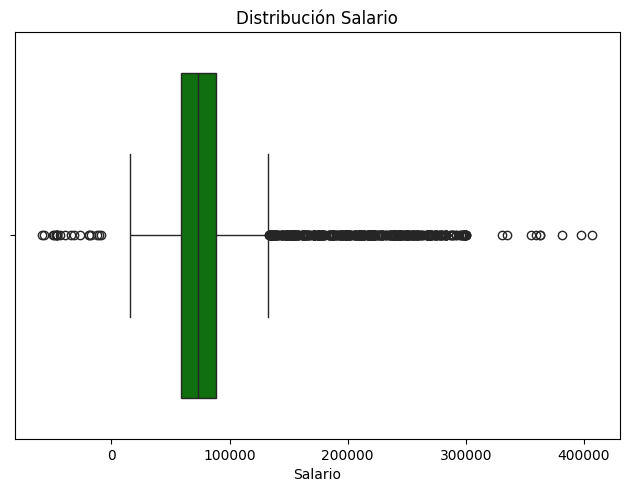

In [38]:
# Para comprobar que hay muchos datos atípicos puedo hacer un boxplot, donde se pueda ver más claramente

sns.boxplot(x = 'Salary', data = customer_info, color="green")
plt.tight_layout()

plt.title("Distribución Salario")
plt.xlabel("Salario")

In [39]:
print(f"""
Como podemos ver en el boxplot anterior, vemos que la mayoría de datos se concentran entre un poco mas de 
cero y un poco más de 100000 pero tenemos muchos outliers, que son todos los puntos que aparecen fuera de 
las dos barras verticales. """)

# Teniendo en cuenta lo anterior, imputamos los nulos de 'Salary' haciendo que los valores nulos tomen el valor de la mediana
median_salary = customer_final['Salary'].median()
customer_final['Salary'] = customer_final['Salary'].fillna(median_salary)
customer_info['Salary'] = customer_info ['Salary'].fillna(median_salary)

print(f"""
Comprobamos que, despues de la imputación, el número de nulos que queda en la columna 'Salary' es 0
SUMA NULOS TOTALES SALARY ==> {customer_final['Salary'].isnull().sum()}
COMPROBAMOS QUE EN DATAFRAMA Customer_info tambiés es 0 ==> {customer_info['Salary'].isnull().sum() == 0}
""")


Como podemos ver en el boxplot anterior, vemos que la mayoría de datos se concentran entre un poco mas de 
cero y un poco más de 100000 pero tenemos muchos outliers, que son todos los puntos que aparecen fuera de 
las dos barras verticales. 

Comprobamos que, despues de la imputación, el número de nulos que queda en la columna 'Salary' es 0
SUMA NULOS TOTALES SALARY ==> 0
COMPROBAMOS QUE EN DATAFRAMA Customer_info tambiés es 0 ==> True



In [40]:
print("""
En el caso de Cancellation Year y Month los nulos dan información, pues indican que no se ha producido cancelacion 
por parte del cliente. En este caso creo que no hace falta imputarlos, ni eliminarlos. """)


En el caso de Cancellation Year y Month los nulos dan información, pues indican que no se ha producido cancelacion 
por parte del cliente. En este caso creo que no hace falta imputarlos, ni eliminarlos. 


In [41]:
# MODIFICACION TIPOS DE DATOS

print(f"""
Las columnas ==> \n'Enrollment Year', 'Enrollment Month','Cancellation Year', 'Cancellation Month', 'Year', 'Month'
no son homogéneas.
* Unas son de formato int ==> \n{customer_final[['Enrollment Year', 'Enrollment Month','Cancellation Year', 'Cancellation Month', 'Year', 'Month']].select_dtypes(include=int).columns}
* Otras son de formato float ==> \n{customer_final[['Enrollment Year', 'Enrollment Month','Cancellation Year', 'Cancellation Month', 'Year', 'Month']].select_dtypes(include=float).columns}
Lo suyo es que todas fueran del mismo tipo, si tuvieramos fecha completa convertiriamos a datetype, pero como solo tenemos mes o día
convierto todo a int""")



Las columnas ==> 
'Enrollment Year', 'Enrollment Month','Cancellation Year', 'Cancellation Month', 'Year', 'Month'
no son homogéneas.
* Unas son de formato int ==> 
Index(['Enrollment Year', 'Enrollment Month', 'Year', 'Month'], dtype='object')
* Otras son de formato float ==> 
Index(['Cancellation Year', 'Cancellation Month'], dtype='object')
Lo suyo es que todas fueran del mismo tipo, si tuvieramos fecha completa convertiriamos a datetype, pero como solo tenemos mes o día
convierto todo a int


In [42]:
print(f"""
Para homogeneizarlas tenemos que convertir el tipo de dato de 'Enrollment Year', 'Enrollment Month', 'Year', 'Month' a float, 
porque hacerlo al reves, no es posible, por la presencia de nulos en Cancellation Year y Cancellation Month que no vamos a imputar. 
""")

customer_final['Enrollment Year'] = customer_final['Enrollment Year'].astype(float)
customer_final['Enrollment Month'] = customer_final['Enrollment Month'].astype(float)
customer_final['Year'] = customer_final['Year'].astype(float)
customer_final['Month'] = customer_final['Month'].astype(float)

print("""
En realidad sería más lógico que fueran en formato int, pero tras haberlo intentado y documentarme creo que no 
es factible mientras haya nulos, pues esto se consideran en pandas de tipo float, para poder hacerlo tendría primero 
que imputar esos nulos por un valor de tipo numérico (ejemplo 0), pero en este caso los nulos los quiero dejar 
como están porque considero que son útiles así. """)


Para homogeneizarlas tenemos que convertir el tipo de dato de 'Enrollment Year', 'Enrollment Month', 'Year', 'Month' a float, 
porque hacerlo al reves, no es posible, por la presencia de nulos en Cancellation Year y Cancellation Month que no vamos a imputar. 


En realidad sería más lógico que fueran en formato int, pero tras haberlo intentado y documentarme creo que no 
es factible mientras haya nulos, pues esto se consideran en pandas de tipo float, para poder hacerlo tendría primero 
que imputar esos nulos por un valor de tipo numérico (ejemplo 0), pero en este caso los nulos los quiero dejar 
como están porque considero que son útiles así. 


In [43]:
print("""Comprobamos que se ha hecho la conversion""")

customer_final.dtypes

Comprobamos que se ha hecho la conversion


Loyalty Number                   int64
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                float64
Enrollment Month               float64
Cancellation Year              float64
Cancellation Month             float64
Year                           float64
Month                          float64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object

In [44]:
# guardo los csv limpios: 
# guardo customer_info_limpio para los estudios en los que tenga que contabilizar cliente individuales, pues aqui Loyalty Number es un identificador único
# guardo customer_final_limpio que es el dataframe limpio tras el inner merge

customer_info.to_csv('files/Customer Info Limpio.csv', index=False)
customer_final.to_csv('files/Customer Final Limpio.csv', index=False)